In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('../..//data/df_rfm_model.csv', index_col=0)

df.head()

,Recency,Frequency,MonetaryValue,Country
Customer_ID,,,,
12347,2,216,4620.32,Iceland
12348,75,46,1658.40,Finland
12349,19,161,3319.06,Italy
12350,310,13,258.00,Norway
12352,36,93,1705.64,Norway


### Cellule 1 : Ajustement du modèle KMeans

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supprimer la colonne 'Country'
df = df.drop('Country', axis=1)

# Sélectionner uniquement les colonnes numériques
df_numerique = df[['Recency', 'Frequency', 'MonetaryValue']]

# Normaliser les données
normalisateur = StandardScaler()
df_normalise = normalisateur.fit_transform(df_numerique)

# Ajuster le modèle KMeans avec les données normalisées
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Vous pouvez changer le nombre de clusters
kmeans.fit(df_normalise)

# Ajouter les étiquettes de cluster pour chaque point de données au dataframe
df['Cluster'] = kmeans.labels_

### Cellule 2 : Application de l'ACP et visualisation des clusters

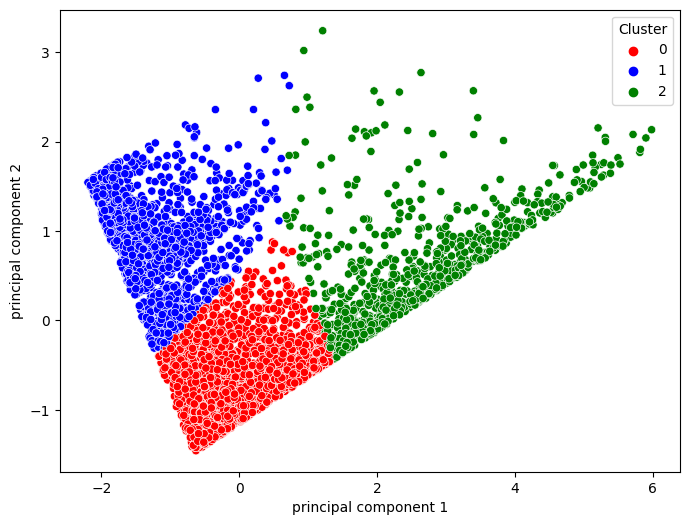

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer l'ACP
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalise)

# Créer un DataFrame avec les composantes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Ajouter les labels de cluster au DataFrame
principalDf['Cluster'] = kmeans.labels_

# Visualiser les clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="principal component 1", y="principal component 2", hue="Cluster", data=principalDf, palette=['red','blue','green'])
plt.show()


In [25]:
# Group by cluster and calculate average RFM values
cluster_avg = df.groupby('Cluster').mean()

# Print the average values
print(cluster_avg)

            Recency   Frequency  MonetaryValue
Cluster                                       
0         74.323553   56.655432     926.281114
1        417.280733   35.528960     543.194190
2         61.316686  231.976163    3804.657719


/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

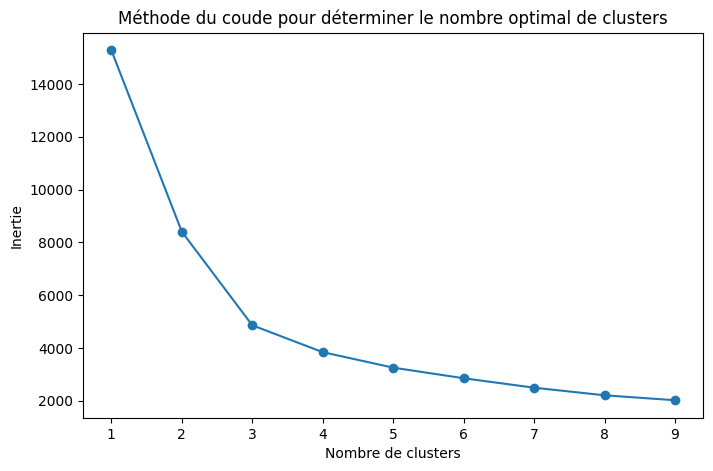

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les valeurs d'inertie pour chaque nombre de clusters
inertias = []

# Boucle sur plusieurs nombres de clusters
for k in range(1, 10):
    # Créer un modèle KMeans avec k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajuster le modèle aux données
    kmeans.fit(df_normalise)
    
    # Ajouter l'inertie du modèle à la liste
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [27]:
# Describe each cluster
for i in df['Cluster'].unique():
    print(f'Cluster {i}')
    print(df[df['Cluster'] == i].describe())
    print('\n------------------------\n')

Cluster 2
          Recency   Frequency  MonetaryValue  Cluster
count  881.000000  881.000000     881.000000    881.0
mean    61.316686  231.976163    3804.657719      2.0
std     85.671576   90.627738    1670.253761      0.0
min      1.000000    7.000000     934.010000      2.0
25%     11.000000  162.000000    2628.990000      2.0
50%     30.000000  223.000000    3526.370000      2.0
75%     68.000000  295.000000    4778.730000      2.0
max    610.000000  447.000000    8438.340000      2.0

------------------------

Cluster 0
           Recency    Frequency  MonetaryValue  Cluster
count  2522.000000  2522.000000    2522.000000   2522.0
mean     74.323553    56.655432     926.281114      0.0
std      66.429313    44.759792     709.767503      0.0
min       1.000000     1.000000       0.000000      0.0
25%      22.000000    21.000000     369.035000      0.0
50%      53.000000    46.000000     749.905000      0.0
75%     111.750000    81.000000    1313.920000      0.0
max     288.000000 